# Applying KMeans in Tugas

<a id='toc'></a>

### Table of Contents
* [1. Import the libraries and the dataset](#import)<br>
* [2. Preprocessing](#preprocessing) <br>
* [3. Modelling](#Modelling) <br>
    * [3.1. First perspective: Product usage](#first)<br>
        * [3.1.1. Identify the right number of clusters](#number_clusters)<br>
            * [3.1.1.1. The elbow method](#elbow)<br>
            * [3.1.1.2. The dendrogram](#dendrogram)<br>
        * [3.1.2. Explore different number of clusters](#explore)<br>
            * [3.1.2.1. When k is equal to 2](#k2)<br>
            * [3.1.2.2. When k is equal to 3](#k3)<br>
            * [3.1.2.3. When k is equal to 4](#k4)<br>
        * [3.1.3. Explore and analyse in detail the number of clusters chosen](#final_k3)
            * [3.1.3.1. Using visualizations](#visual)<br>
            * [3.1.3.2. Analyse further - Checking variables not used during clustering](#others)<br>
* [4. Exercise](#exercise) <br>
* [5. Merge different perspectives](#merge)<br>

In this exercise, you will be applying KMeans to the Tugas Dataset. <br>
The dataset contains historical information on the behavior of customers of a retailer company.<br>

When clustering customers in cases like Tugas, two essential perspectives could be considered: <br>
- __Product Usage:__ Divide customers based on their needs, attitudes, and interests, taking into consideration their product usage.
    - _Possible variables to use:_ Toys, SmallAppliances, Kitchen, HouseKeeping, and Clothes.
- __Customer value:__ Evaluate groups of customers in terms of revenue generated and the costs of maintaining relationships with them.
    - _Possible variables to use:_ Rcn, Income, Frq, NetPurchase, Mnt, ...



<div class="alert alert-block alert-success">
<a id='import'>
<font color = '#006400'> 
    
# 1. Import the libraries and the dataset</font>
</a>
    
</div>

In [2]:
import warnings
warnings.filterwarnings('ignore')

__Step 1:__ Import the necessary libraries:
- pandas as pd
- matplotlib.pyplot as plt 
- seaborn as sns 

In [3]:
# DO IT
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Step 2:__ Import the 'Tugas_Database.xlsx' dataset and assign it to the `df` object.

In [6]:
# DO IT
df = pd.read_excel("/Users/carolinamassena/Desktop/Personal/Education/EDIT/Unit 8/LAB2 - KMeans/Tugas_Database.xlsx")
df

,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Dt_Customer,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation
0,1001,1947,F,Graduation,Widow,0,95321.10,2013-11-02,66,33,1458.08,37,5,44,10,3,19,81,5
1,1002,1937,F,PhD,Widow,0,118674.15,2014-04-17,6,32,1598.48,55,1,38,4,2,9,91,5
2,1003,1991,M,Graduation,NaN,1,29761.20,2014-05-27,69,11,45.76,32,19,24,1,24,59,41,3
3,1004,1956,M,Master,Married,1,98249.55,2013-07-21,10,26,923.52,60,10,19,6,5,35,65,5
4,1005,1956,F,Graduation,Married,1,96444.60,2013-02-02,26,31,1183.52,59,5,28,4,4,34,66,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10996,1987,F,Graduation,Single,0,57006.60,2013-05-08,72,29,1051.44,41,11,36,1,11,31,69,4
9996,10997,1939,F,2n Cycle,Together,1,132260.10,2014-04-03,75,38,1734.72,61,2,25,5,6,45,55,5
9997,10998,1946,M,Master,Married,0,104609.40,2014-05-24,98,33,1527.76,46,0,29,11,14,18,82,6
9998,10999,1950,F,Basic,Married,1,116568.90,2014-05-12,4,32,1404.00,48,16,27,8,1,36,64,5


[BACK TO TOC](#toc)

<div class="alert alert-block alert-success">
<a id='preprocessing'>
<font color = '#006400'> 
    
# 2. Preprocessing </font>
</a>
    
</div>

In the previous practical class, we saw several methods to preprocess the available data. <br>
We also learned that before preprocessing, we need to explore the data to gain insights and identify possible errors or problems. <br>
Since this class is not focused on data exploration, we will simply redefine the index. <br>

__Step 3:__ Define the index of the dataframe with the column `Custid`, using the `set_index` function, and set the `inplace` parameter to `True`.

In [7]:
#DO IT
df.set_index('Custid', inplace = True)

[BACK TO TOC](#toc)

<div class="alert alert-block alert-success">
<a id='Modelling'>
<font color = '#006400'> 
    
# 3. Modelling
</a>
    
</div>

<div class="alert alert-block alert-warning">

<a id='first'></a>
## 3.1. First perspective: Product usage </font>

</div>

__Step 4:__  This time, we will apply KMeans using the product usage perspective. <br> 
Create a new dataframe named `df_prod` and select only the necessary variables for product usage: <br>
- Clothes, Kitchen, SmallAppliances, HouseKeeping, and Toys.


In [16]:
# DO IT
df_prod = df[['Clothes','Kitchen','SmallAppliances','HouseKeeping','Toys']].copy()
df_prod

,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys
Custid,,,,,
1001,37,5,44,10,3
1002,55,1,38,4,2
1003,32,19,24,1,24
1004,60,10,19,6,5
1005,59,5,28,4,4
...,...,...,...,...,...
10996,41,11,36,1,11
10997,61,2,25,5,6
10998,46,0,29,11,14


[BACK TO TOC](#toc)
<div class="alert alert-block alert-info">
    
<a id='number_clusters'></a>

### 3.1.1. Identify the right number of clusters
    
</div>

Now we are ready to apply KMeans.

**Step 5:** Import `KMeans` from `sklearn.cluster`.

In [4]:
# DO IT
from sklearn.cluster import KMeans

Usually, we do not know the right number of clusters to use beforehand. How can we determine the right number of clusters?

<a id='elbow'></a>

### 3.1.1.1. Using the elbow method

In this phase you will try to identify the optimal number of clusters by analyzing the results of the K-means inertia graph, using the elbow method.

__Step 6:__ Measure the quality of clusterings with different numbers of clusters.  Follow these steps:

  - Create a list named `ks` with values ranging from 1 to 10. This will be range of cluster numbers to be tested.
  - Create an empty list named `inertias`. This will store the sum of squared errors (SSE) based on the number of clusters.<br><br>
  
  - Next, in a loop, where you will test all possible values of k:
      - Create a `KMeans` instance called `model` with `n_clusters = k`. 
      - Fit the model to the data.
      - Append the value of the `inertia_` attribute of each model to the list `inertias`.

In [27]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_prod)
    inertias.append(model.inertia_)

**Step 7:**  Plot the inertia to identify the optimal number of clusters. Remember that lower numbers are better!

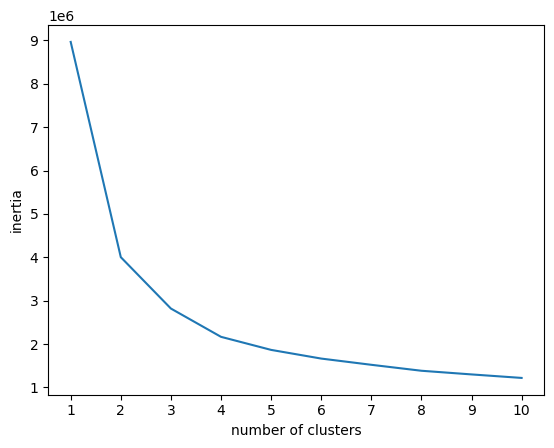

In [30]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

From the graph, it appears that 3 is the optimal number of clusters, as this is where the inertia (or the sum of squared errors) begins to decrease more slowly. However, it is always good practice to investigate whether other values may be better solutions.

<a id='dendrogram'></a>

### 3.1.1.2. Using a dendrogram


**Step 8:**  You can also use a dendrogram to visualize the optimal number of clusters to use. Obtain a dendrogram to visualize the number of clusters.

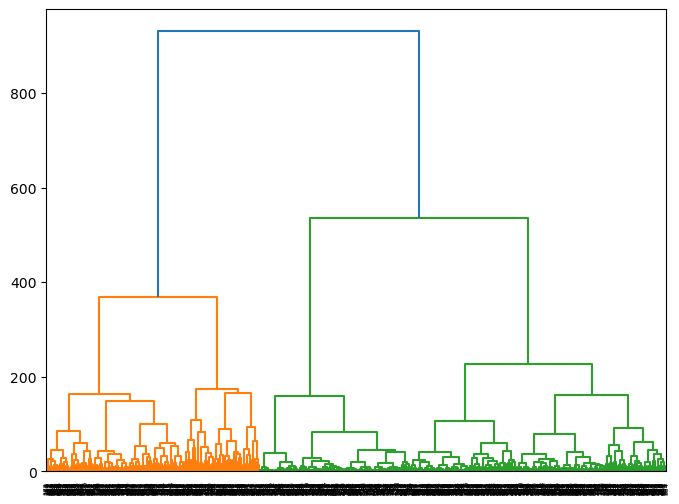

In [35]:
from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
df_prod_sample = df_prod.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(df_prod_sample, method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

Looking at the dendrogram, we can also check that 2, 3 or 4 clusters seem to be the optimal number of clusters to define.

__NOTE: The following values can be different each time you run the algorithm, due to the fact that different initial seeds can lead to different solutions. However, you can define a random_state in the definition of the KMeans instance to ensure that the same initial seeds are used.__ <br>

__Also note that the results may differ on computers with different versions of the packages installed ( such as jupyter notebook, scikit-learn, ...)__<br>

[BACK TO TOC](#toc)

<div class="alert alert-block alert-info">
    
<a id='explore'></a>

### 3.1.2. Explore different number of clusters
    
</div>

Based on the previous steps, it was determined that the optimal number of clusters should range between 2 and 4. <br>
How to choose the best number of clusters? __Explore the results!__

<a id='k2'></a>

### 3.1.2.1. Using K = 2

**Step 9:** Create a KMeans instance called `model_k2` using `KMeans()` and set `n_clusters` as 2, `random_state` as 100. Then, fit the instance to your data (a copy of the original dataframe named `df_prod_k2`). 

In [43]:
df_prod_k2 = df_prod.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(df_prod_k2)

__Step 10:__ Create a new column in the dataframe named `label`, which will store the cluster number that each observation belongs to. To obtain those values, you need to call the attribute `.labels_` in the `model_k2`.

In [46]:
# DO IT
df_prod_k2['label'] = model_k2.labels_

__Step 11:__ Use `.mean()` to obtain the centroid value for each cluster.

In [49]:
#DO IT
df_prod_k2.groupby(['label']).mean().transpose()

label,0,1
Clothes,30.702272,70.205339
Kitchen,11.154045,2.925331
SmallAppliances,35.975688,21.013047
HouseKeeping,11.178557,2.931353
Toys,10.977282,2.888398


Using two clusters, we can conclude that:
- Cluster 0 contains the customers who spend the most on all the products except clothes.
- Cluster 1 is the one where customers spend more money on clothes and a small value on all the other categories.

Now it is time to check with 3 clusters and see if we can still get distinct clusters.

<a id='k3'></a>

### 3.1.2.2. Using K = 3

**Step 12:** Create a KMeans instance called `model_k3` using `KMeans()` and set `n_clusters` as 3, `random_state` as 100. Then, fit the instance to your data (a copy of the original dataframe named `df_prod_k3`). 

In [54]:
# DO IT
df_prod_k3 = df_prod.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_prod_k3)

__Step 13:__ Create a new column named `label` in the dataframe `df_prod_k3`. This column will store the cluster number that each observation belongs to. To do this, you should assign the result of `model_k3.labels_` to this new column.

In [57]:
# DO IT
df_prod_k3['label'] = model_k3.labels_

__Step 14:__ To obtain descriptive statistics that summarize the central tendency, dispersion, and shape for each cluster, use the `.describe()` method and group the data by the `label` column. Save the result in the object `descr`.

In [60]:
#DO IT
descr = df_prod_k3.groupby(['label']).mean().transpose()
descr

label,0,1,2
Clothes,46.711062,75.934807,19.504098
Kitchen,6.129960,2.240079,15.543443
SmallAppliances,35.012897,17.355442,33.938934
HouseKeeping,6.088790,2.232993,15.684426
Toys,6.049851,2.183390,15.318852



By checking the above table, you can start to understand the distinct "behaviour" of the costumers according to the cluster they belong to. <br>

__Cluster0:__ This cluster can be considered the cluster that groups individuals who spend a medium value in all categories, compared to Cluster 1 and Cluster 2, except for SmallAppliances, where this group spends the most.<br>

__Cluster1:__ The customers in this cluster mainly spend money on clothes. <br>

__Cluster2:__ These are the customers who spend less on clothes but more on the other categories (except for SmallAppliances where the value is quite similar to Cluster 0). <br>





__Step 15:__ Check the distance between the different clusters using euclidean distance. To do this, use the `euclidean_distances` function from `sklearn.metrics.pairwise`.

In [64]:
from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(model_k3.cluster_centers_)
dists

array([[ 0.        , 34.82349404, 31.73069474],
       [34.82349404,  0.        , 63.14483114],
       [31.73069474, 63.14483114,  0.        ]])

What can we conclude?
- The nearest cluster to cluster 0 is Cluster 2 (31.75);
- The nearest cluster to cluster 1 is Cluster 0 (34.80);
- The nearest cluster to cluster 2 is cluster 0 (31.75);
- Cluster 1 and Cluster 2 are the farthest away (63.17).

Using the euclidean distance, we can also see that Cluster 1 and Cluster 2 are the farthest apart, while Cluster 0 is the nearest to both of them. This suggests that there is less overlap between the spending behaviors of Cluster 1 and Cluster 2, while Cluster 0 may share some similarities with both of them.

<a id='k4'></a>

### 3.1.2.3. Using K = 4

This time, we will qualitatively analyze the results for a KMeans of 4 clusters. <br><br>
**Step 16:** Create a KMeans instance called `model_k4` using `KMeans()` and set `n_clusters` as 4, `random_state` as 100. Then, fit the instance to your data (a copy of the original dataframe named `df_prod_k4`). 

In [69]:
# DO IT
df_prod_k4 = df_prod.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_prod_k4)

**Step 17:** Create a new column in the dataframe named `label`, which will store the cluster number that each observation belongs to.

In [72]:
# DO IT
df_prod_k4['label'] = model_k4.labels_

**Step 18:** Find the centroid of the new clusters using `.mean()`.

In [75]:
# DO IT
df_prod_k4.groupby(['label']).mean().transpose()

label,0,1,2,3
Clothes,31.669691,79.370235,16.847107,54.799411
Kitchen,8.190103,1.769428,18.950413,5.402356
SmallAppliances,44.027216,15.310484,26.074380,29.107511
HouseKeeping,8.146392,1.726173,19.263774,5.379381
Toys,7.961237,1.756598,18.851240,5.303093


__Note:__ The label of the clusters can be assigned differently.

__Cluster 0:__<br>
- The customers who spend more on: Small appliances (44)
- The customers who spend moderately on: Clothes (32), Kitchen (8), Housekeeping (8), Toys (8)
- The customers who spend less on: X

__Cluster 1:__<br>
- The customers who spend more on: Clothes (80)
- The customers who spend moderately on: X
- The customers who spend less on: Kitchen (2), SmallAppliances (15), HouseKeeping (2), Toys (2)

__Cluster 2:__<br>
- The customers who spend more on: Kitchen (19), HouseKeeping (19), Toys (19)
- The customers who spend moderately on: SmallAppliances (26)
- The customers who spend less on: Clothes (17)

__Cluster 3:__<br>
- The customers who spend more on: X <br>
- The customers who spend moderately on: Clothes (55), Kitchen (5), SmallAppliances (28), HouseKeeping (5), Toys (5)<br>
- The customers who spend less on: X<br>

Does it make sense to keep both cluster 3 and 0? 
- Cluster 3 spends moderately on all categories, and they also spend a significant value on small appliances (28).
- Cluster 0 are the ones who buy more small appliances, but they also spend some money on all the other products.


Perhaps it does not make sense to keep 4 different clusters...

For the remaining steps, we will keep only 3 clusters.

[BACK TO TOC](#toc)

<div class="alert alert-block alert-info">

<a id='final_k3'></a>

### 3.1.3. Explore and analyze in detail the chosen number of clusters
    
</div>

We have already explored the results for k=3 in step 15, but we can delve deeper.

<a id='visual'></a>

### 3.1.3.1. Using visualizations

In [82]:
df_prod_k3.groupby(['label']).mean()

,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys
label,,,,,
0,46.711062,6.129960,35.012897,6.088790,6.049851
1,75.934807,2.240079,17.355442,2.232993,2.183390
2,19.504098,15.543443,33.938934,15.684426,15.318852


In [84]:
# Create a mapping for cluster labels based on average 'Clothes' spending
cluster_mapping = {}

for cluster in range(3):
    avg_clothes = df_prod_k3[df_prod_k3['label'] == cluster]['Clothes'].mean()
    
    if avg_clothes > 70:
        cluster_mapping[cluster] = 'ClothesSpenders'
    elif avg_clothes < 20:
        cluster_mapping[cluster] = 'HighSpendersNoClothes'
    else:
        cluster_mapping[cluster] = 'MidSpenders'

# Apply the mapping to assign the correct labels
df_prod_k3['ProductUsage'] = df_prod_k3['label'].map(cluster_mapping)

__Step 19:__ Create a separate dataframe composed of individuals in each cluster.

In [87]:
# DO IT
MidSpenders = df_prod_k3[df_prod_k3.ProductUsage=='MidSpenders']
ClothesSpenders = df_prod_k3[df_prod_k3.ProductUsage=='ClothesSpenders']
HighSpendersNoClothes = df_prod_k3[df_prod_k3.ProductUsage=='HighSpendersNoClothes']

__Step 20:__ In this step, you will create three `sns.histplots()` that display the distribution of the variable 'Clothes' for each cluster. <br>
In a single cell, using the `sns.histplot()`: <br>
- Plot the data for `MidSpenders['Clothes']` and define parameters `color='red'` and `label='Clothes - MidSpenders'` and `bins = 20`.
- Plot the data for `ClothesSpenders['Clothes']` and define parameters `color='yellow'` and `label='Clothes - ClothesSpenders'` and `bins = 20`.
- Plot the data for `HighSpendersNoClothes['Clothes']` and define parameters `color='green'` and `label='Clothes - HighSpendersNoClothes'` and `bins = 20`.
- Call the command `plt.legend()` to make the legend of the visualization visible.

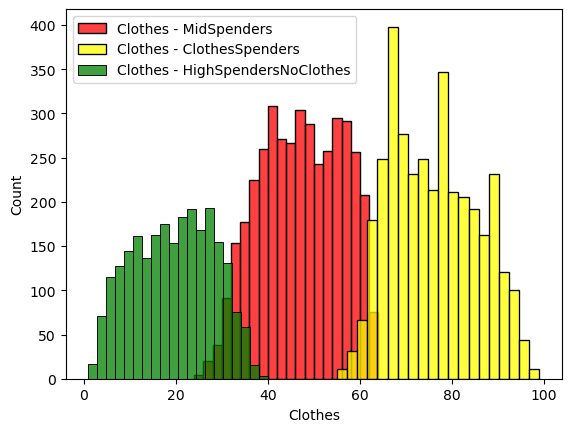

In [90]:
# DO IT
sns.histplot(MidSpenders['Clothes'],color='red', label='Clothes - MidSpenders', bins = 20)
sns.histplot(ClothesSpenders['Clothes'],color='yellow', label='Clothes - ClothesSpenders', bins = 20)
sns.histplot(HighSpendersNoClothes['Clothes'],color='green', label='Clothes - HighSpendersNoClothes', bins = 20)
plt.legend()
plt.show()

__Step 21:__ Now you are going to create a __scatterplot__ to visualize the relation between the variable `Clothes` and `Kitchen` for all three clusters.

__a)__ Obtain the coordinates of the centroids using the `.cluster_centers_` attribute of `model`.  Assign them to `centroids`.

__NOTE: If you don't define a random_state in the KMeans algorithm (Step 8), the following values can be different each time you run the algorithm, due to the fact that distinct initial seeds can lead to different solutions.__ <br><br>

In [94]:
# DO IT
centroids = model_k3.cluster_centers_
centroids

array([[46.65649044,  6.13005709, 35.05112931,  6.09779102,  6.05708613],
       [75.90328054,  2.2446267 , 17.37952489,  2.2341629 ,  2.18523756],
       [19.48829569, 15.5687885 , 33.89650924, 15.70020534, 15.33593429]])

In [96]:
df_prod.columns

Index(['Clothes', 'Kitchen', 'SmallAppliances', 'HouseKeeping', 'Toys'], dtype='object')

In the previous step, you obtained an array where you will have the centroid for each variable in each cluster. For example, 76.2 is the value of the centroid for the variable `Clothes` in cluster0 and so on...

__b)__ By using the results stored in centroids, extract the individual values so you can plot them in a scatter plot (next step):
- Save the centroid value of cluster0 concerning the variable Clothes in `centroid_0_Clothes` - that is, the value of `centroids[0,0]`; <br>
- Apply the same logic to create the objects `centroid_1_Clothes`, `centroid_2_Clothes`, `centroid_0_Kitchen`, `centroid_1_Kitchen` and `centroid_2_Kitchen`. <br>

In [100]:
centroid_0_Clothes = centroids[0,0]
centroid_1_Clothes = centroids[1,0]
centroid_2_Clothes = centroids[2,0]
centroid_0_Kitchen = centroids[0,1]
centroid_1_Kitchen = centroids[1,1]
centroid_2_Kitchen = centroids[2,1]

__c)__ In a single cell, create four scatter plots (this will show the four on top of each other).  Call `plt.show()` just once, at the end.
- Firstly, make a scatter plot calling `plt.scatter` of `df_prod_k3['Clothes']` and `df_prod_k3['Kitchen']`, define the parameter `c=df_prod['label']` to color each cluster differently, and `s=10`to define the size of the points;
- Secondly, make a scatter plot calling `plt.scatter` of `centroid_0_Clothes` and `centroid_0_Kitchen`, using `'X'` (a cross) as a marker by specifying the `marker` parameter. Set the size of the markers to be `100` using `s=100`. 
- In the same way as the previous step, create the third scatter plot but this time using the pairs `centroid_1_Clothes` and `centroid_1_Kitchen` and the fourth plot using the pairs `centroid_2_Clothes` and `centroid_2_Kitchen`.


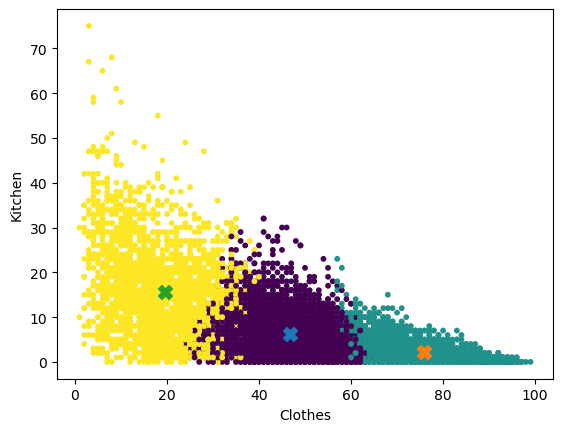

In [103]:
plt.scatter(df_prod_k3.Clothes, df_prod_k3.Kitchen, c=df_prod_k3.label, s=10)
plt.scatter(centroid_0_Clothes, centroid_0_Kitchen, marker='X', s=100)
plt.scatter(centroid_1_Clothes, centroid_1_Kitchen, marker='X', s=100)
plt.scatter(centroid_2_Clothes, centroid_2_Kitchen, marker='X', s=100)
plt.xlabel('Clothes')
plt.ylabel('Kitchen')
plt.show()

It can be concluded that the lower the values of `Clothes`, the higher the money spent on `Kitchen`, and vice versa. <br><br>
It is important to note that when using KMeans, distances are used, and therefore, it is advisable to scale the dataset to a specific range rather than using the original values. However, in this case, scaling was not necessary as the variables were of the same scale (monetary units).

<a id='others'></a>
### 3.1.3.2. Analyze further - Checking variables not used during clustering

__Step 22:__ You can go further and for each cluster that you have now, analyze the profile of the customers on other variables that were not used during cluster, such as demographic data.

__a)__ Create a new dataframe named `df_demog` with four demographic variables - `Gender`, `Education`, `Marital Status`, and `Dependents` - and concatenate it with `df_prod_k3` to create a new dataframe named `demo_view`.


In [108]:
df_demog = df[['Gender','Education','Marital_Status','Dependents']].copy()
demo_view = pd.concat([df_prod_k3, df_demog], axis=1)

__b)__ Create a different dataframe for each cluster, composed of the individuals belonging to that cluster only. For instance, `cluster0_demo` will be composed of the individuals belonging to cluster 0, and so on. 

In [111]:
MidSpenders_demo = demo_view[demo_view.ProductUsage=='MidSpenders']
ClothesSpenders_demo = demo_view[demo_view.ProductUsage=='ClothesSpenders']
HighSpendersNoClothes_demo = demo_view[demo_view.ProductUsage=='HighSpendersNoClothes']

__c)__ Analyze the demographic data of each cluster by using various methods such as the following methods:
- `describe()`
- `value_counts()`
- `mean()` <br>

We can start by analyzing cluster 0, followed by the remaining clusters.

__MidSpenders__

In [114]:
print('***Descriptive Summary of Categorical variables***')
print(MidSpenders_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(MidSpenders_demo['Education'].value_counts()/len(MidSpenders_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(MidSpenders_demo['Dependents'].mean())

***Descriptive Summary of Categorical variables***
       ProductUsage Gender   Education Marital_Status
count          4032   4030        4016           4008
unique            1      3           6              6
top     MidSpenders      F  Graduation        Married
freq           4032   3030        2212           1601
 
***Frequency for each level of education***
Education
Graduation    54.86
2n Cycle      16.39
Master        14.86
Basic          7.22
PhD            5.93
OldSchool      0.35
Name: count, dtype: float64
 
***Mean of Dependents***
0.6287202380952381


__ClothesSpenders__

In [117]:
print('***Descriptive Summary of Categorical variables***')
print(ClothesSpenders_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(ClothesSpenders_demo['Education'].value_counts()/len(ClothesSpenders_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(ClothesSpenders_demo['Dependents'].mean())

***Descriptive Summary of Categorical variables***
           ProductUsage Gender   Education Marital_Status
count              3528   3526        3522           3514
unique                1      3           6              6
top     ClothesSpenders      F  Graduation        Married
freq               3528   2681        1770           1458
 
***Frequency for each level of education***
Education
Graduation    50.17
Master        22.59
PhD           12.02
2n Cycle      10.94
Basic          3.71
OldSchool      0.40
Name: count, dtype: float64
 
***Mean of Dependents***
0.8619614512471655


__HighSpendersNoClothes__

In [120]:
print('***Descriptive Summary of Categorical variables***')
print(HighSpendersNoClothes_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(HighSpendersNoClothes_demo['Education'].value_counts()/len(HighSpendersNoClothes_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(HighSpendersNoClothes_demo['Dependents'].mean())

***Descriptive Summary of Categorical variables***
                 ProductUsage Gender   Education Marital_Status
count                    2440   2437        2428           2430
unique                      1      3           6              6
top     HighSpendersNoClothes      F  Graduation         Single
freq                     2440   1829         896           1023
 
***Frequency for each level of education***
Education
Graduation    36.72
Basic         32.91
2n Cycle      26.43
Master         2.34
OldSchool      0.57
PhD            0.53
Name: count, dtype: float64
 
***Mean of Dependents***
0.6057377049180328


__SOME CONCLUSIONS__

Based on our analysis, we can conclude that:

- The most frequent gender in all clusters is female.<br>
- Graduation is the most frequent Education level across all clusters. <br>
- Married is the most frequent Marital Status for clusters MidSpenders and ClothesSpenders, while Single is the most frequent for HighSpendersNoClothes.
<br>

- With regards to __Education__:
    - ClothesSpenders comprises customers with higher levels of education:
        - 50% have Graduation
        - 23% have Master's degree
        - 12% have PhD.
    - HighSpendersNoClothes comprises customers with lower levels of education:
        - 37% have Graduation
        - 32% have Basic education
        - 27% have 2nd Cycle.
<br>


- Regarding __dependents__:
    - Cluster 1 includes customers with the highest average number of dependents (0.86), followed by cluster 0 (0.63) and cluster 2 (0.60).
    
    
    ...

[BACK TO TOC](#toc)

<div class="alert alert-block alert-success">
<a id='Exercise'>
<font color = '#006400'> 
    
# 4. Exercise
</a>
    
</div>

>><font color='Orange'> __Practice__ </font>

In this exercise, you will be applying KMeans to analyze customer value.

__`Step 1`__ - Create a new dataframe called `df_value` and select only certain variables related to customer value, such as Rcn, Income, Frq, NetPurchase, and Mnt. It is important to note that the data should be scaled uniformly for KMeans analysis.

In [12]:

df_value = df[["Rcn", "Income", "Frq","NetPurchase","Mnt"]]

print(df_value)

        Rcn     Income  Frq  NetPurchase      Mnt
Custid                                           
1001     66   95321.10   33           19  1458.08
1002      6  118674.15   32            9  1598.48
1003     69   29761.20   11           59    45.76
1004     10   98249.55   26           35   923.52
1005     26   96444.60   31           34  1183.52
...     ...        ...  ...          ...      ...
10996    72   57006.60   29           31  1051.44
10997    75  132260.10   38           45  1734.72
10998    98  104609.40   33           18  1527.76
10999     4  116568.90   32           36  1404.00
11000    24   27704.25    9           52    47.84

[10000 rows x 5 columns]


# Outliers

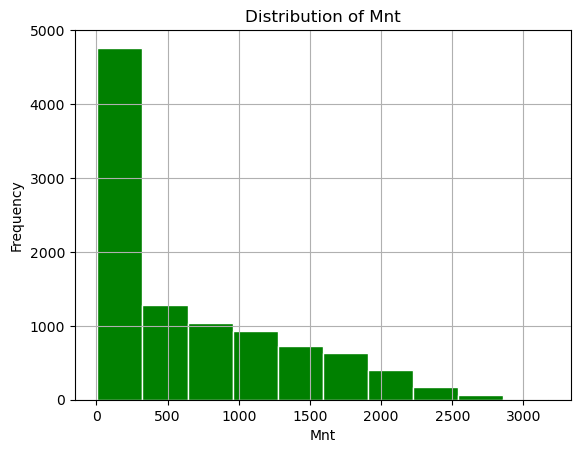

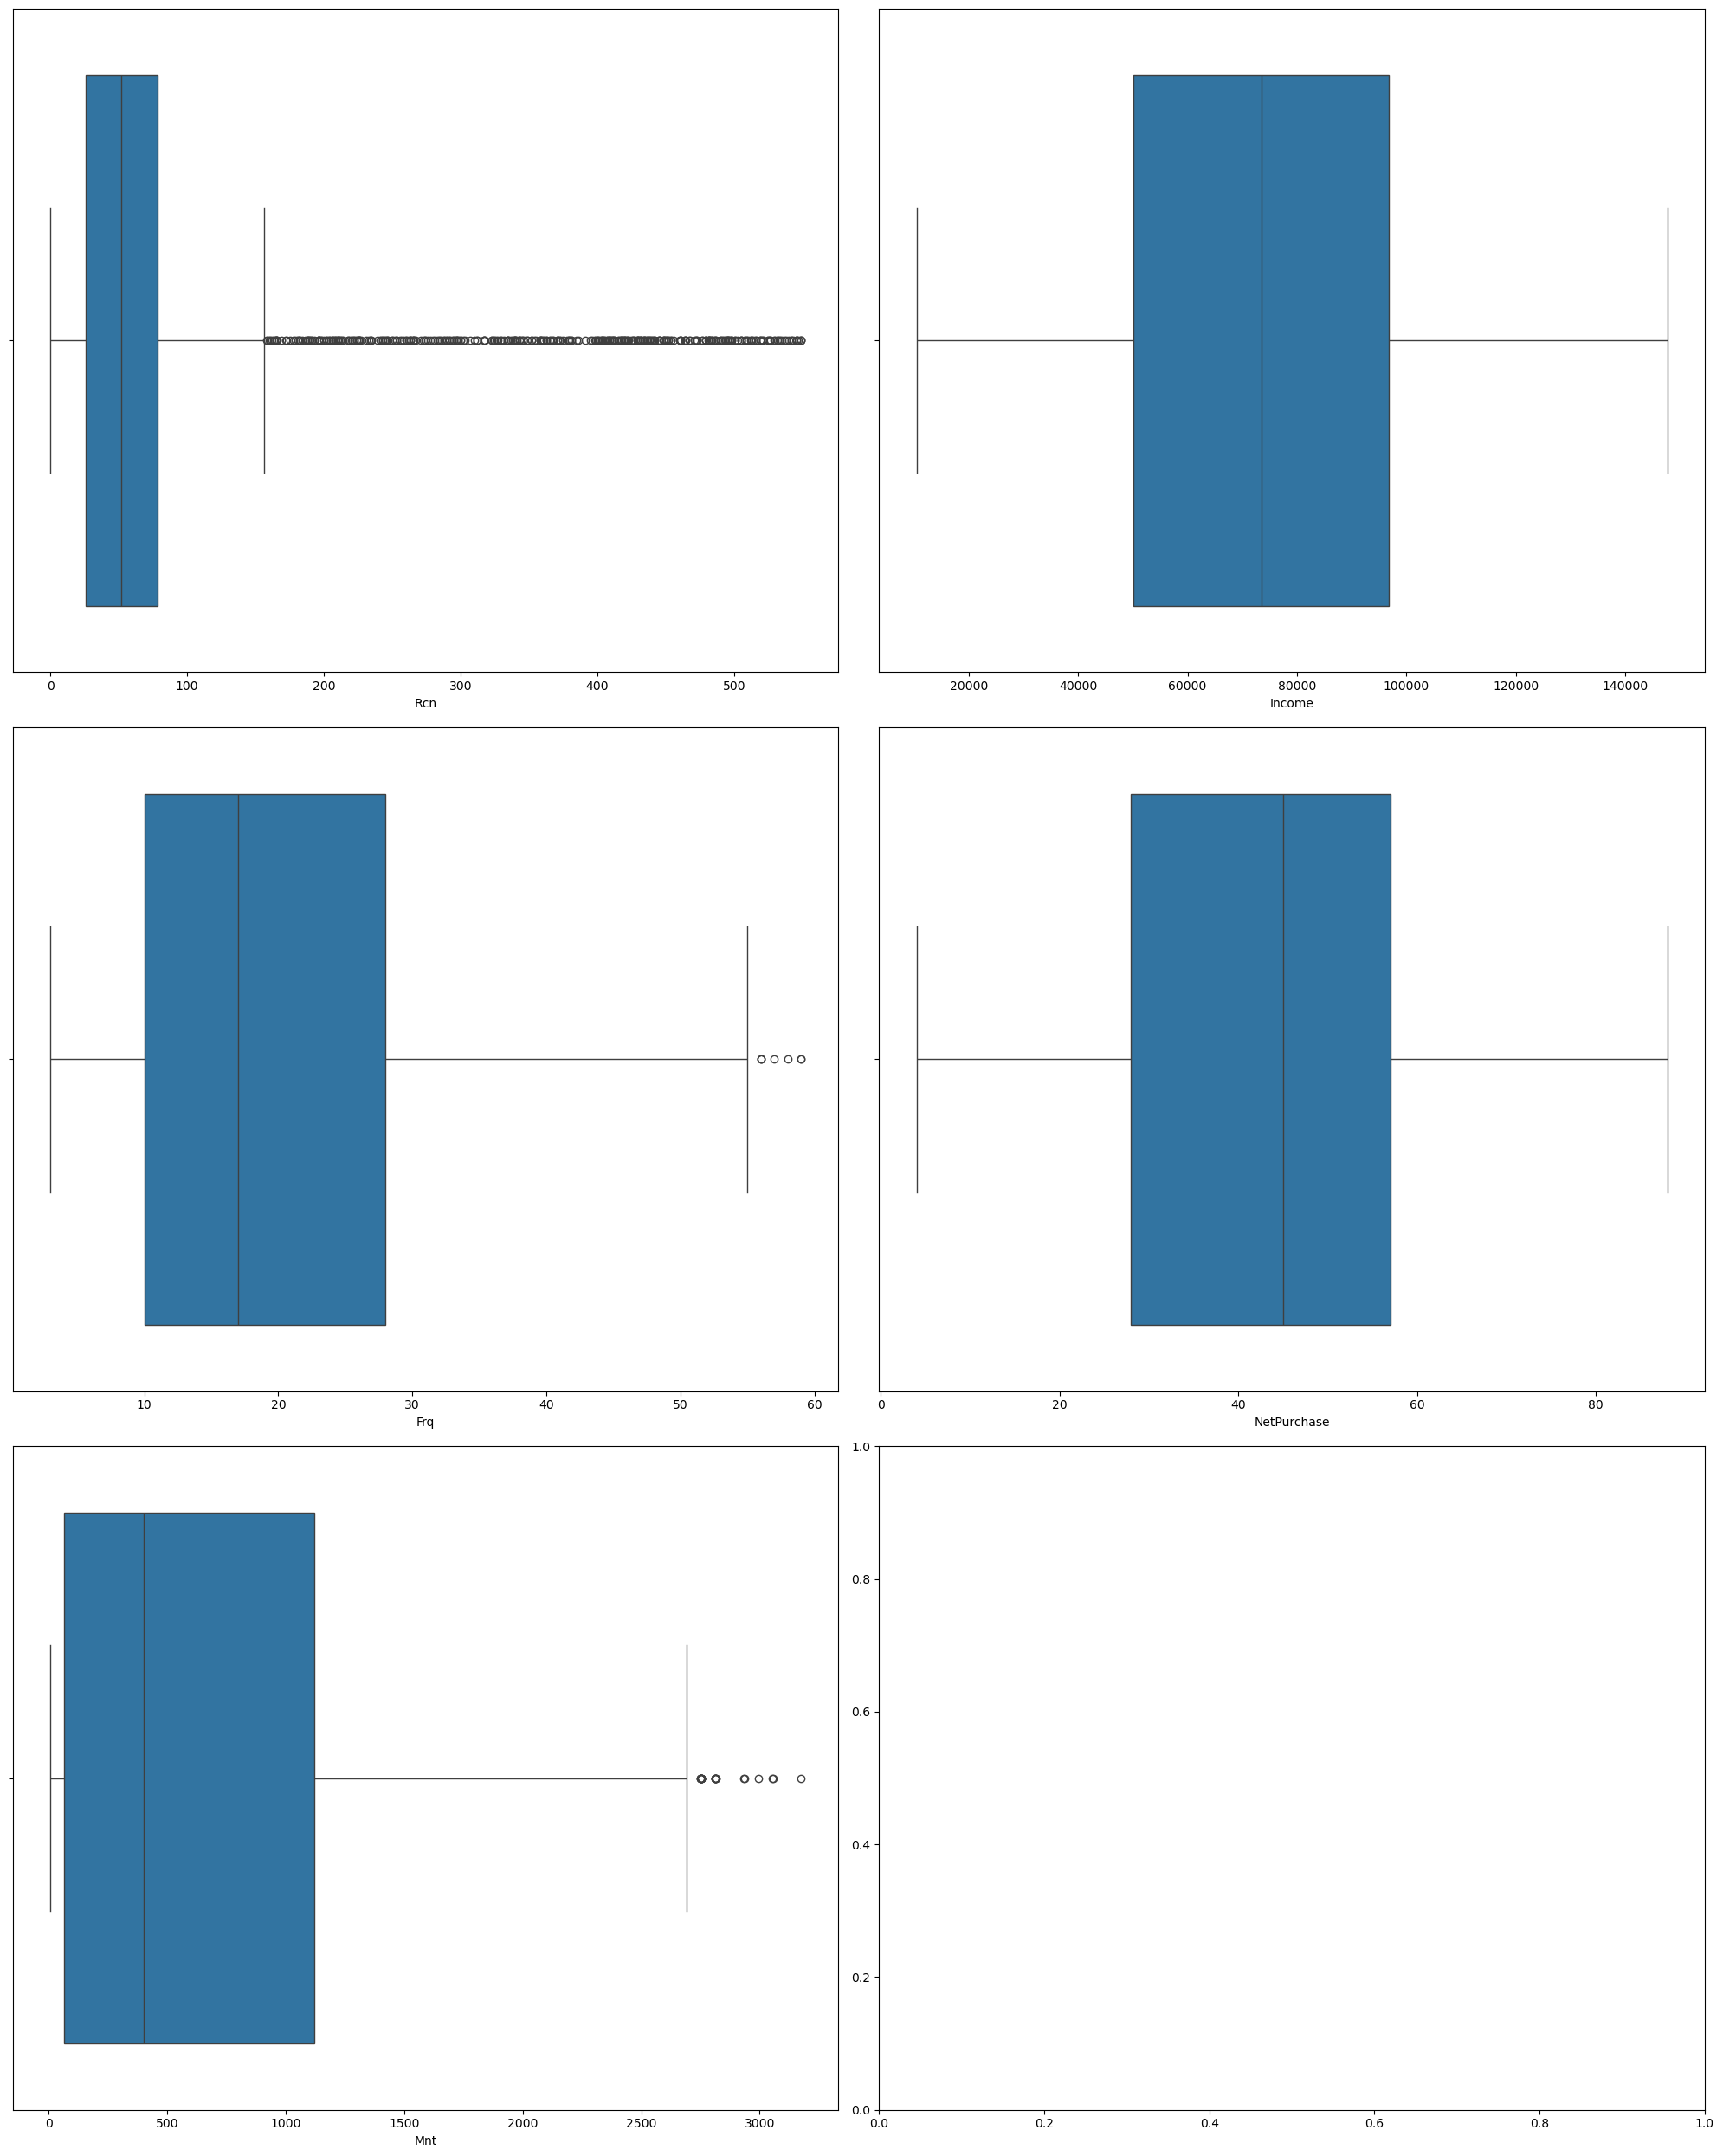

In [ ]:
df["Mnt"].hist(bins=10, color="green", edgecolor="white")
plt.xlabel("Mnt")
plt.ylabel("Frequency")
plt.title("Distribution of Mnt")
plt.show()



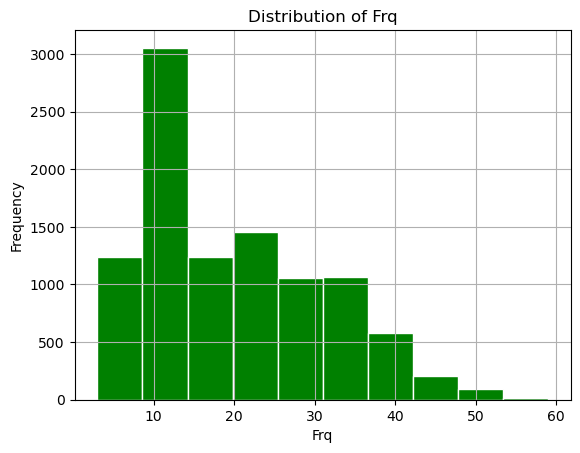

In [15]:
df["Frq"].hist(bins=10, color="green", edgecolor="white")
plt.xlabel("Frq")
plt.ylabel("Frequency")
plt.title("Distribution of Frq")
plt.show()

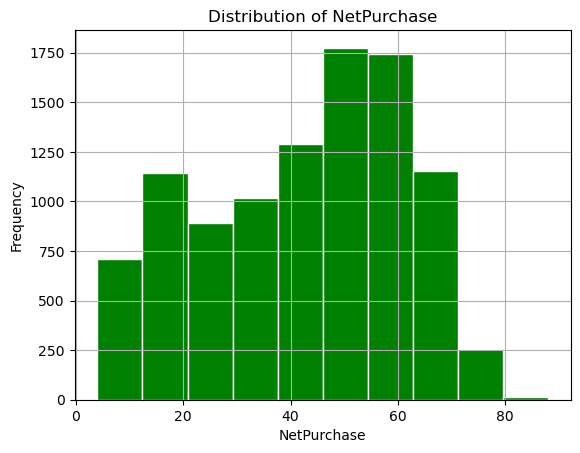

In [16]:
df["NetPurchase"].hist(bins=10, color="green", edgecolor="white")
plt.xlabel("NetPurchase")
plt.ylabel("Frequency")
plt.title("Distribution of NetPurchase")
plt.show()

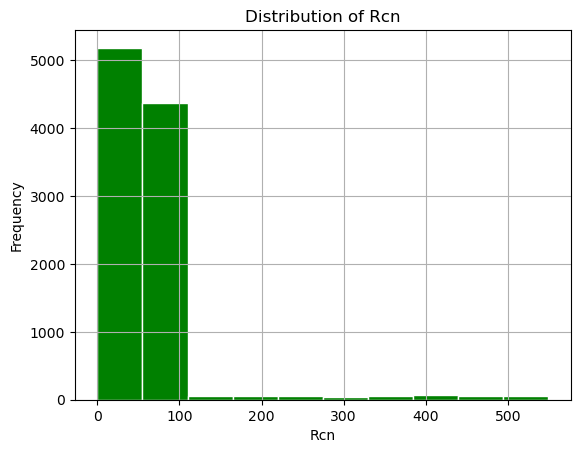

In [17]:
df["Rcn"].hist(bins=10, color="green", edgecolor="white")
plt.xlabel("Rcn")
plt.ylabel("Frequency")
plt.title("Distribution of Rcn")
plt.show()

In [ ]:
#Outliers drops

df_value.drop(df_value[df_value['Frq'] > 55].index, inplace=True)

df_value.drop(df_value[df_value['Mnt'] > 2700].index, inplace=True)

In [ ]:
# Missing Values - replacing values by the mean since it follows approx a normal distribution

income_mean = df_value["Income"].mean()

df_value["Income"] = df_value["Income"].fillna(income_mean)

In [28]:
df_value.describe()

,Rcn,Income,Frq,NetPurchase,Mnt
count,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000
mean,62.429273,73255.323693,19.758797,42.442506,641.994554
std,69.947449,28506.544221,10.789385,18.490620,664.917191
min,0.000000,10500.000000,3.000000,5.000000,6.240000
25%,26.000000,50605.800000,10.000000,28.000000,65.520000
50%,52.000000,73255.323693,17.000000,45.000000,398.320000
75%,78.000000,95785.200000,28.000000,57.000000,1118.000000
max,549.000000,147659.400000,55.000000,88.000000,2692.560000


In [34]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_value)
scaled_df

cols = df_value.columns
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df



,Rcn,Income,Frq,NetPurchase,Mnt
0,0.120219,0.618413,0.576923,0.168675,0.540457
1,0.010929,0.788675,0.557692,0.048193,0.592722
2,0.125683,0.140429,0.153846,0.650602,0.014712
3,0.018215,0.639763,0.442308,0.361446,0.341463
4,0.047359,0.626604,0.538462,0.349398,0.438250
...,...,...,...,...,...
9970,0.131148,0.339070,0.500000,0.313253,0.389082
9971,0.136612,0.887727,0.673077,0.481928,0.643438
9972,0.178506,0.686132,0.576923,0.156627,0.566396
9973,0.007286,0.773326,0.557692,0.373494,0.520325


In [35]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rcn          9975 non-null   float64
 1   Income       9975 non-null   float64
 2   Frq          9975 non-null   float64
 3   NetPurchase  9975 non-null   float64
 4   Mnt          9975 non-null   float64
dtypes: float64(5)
memory usage: 389.8 KB


__`Step 2`__ - Determine the optimal number of clusters by using the elbow method.

In [36]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(scaled_df)
    inertias.append(model.inertia_)

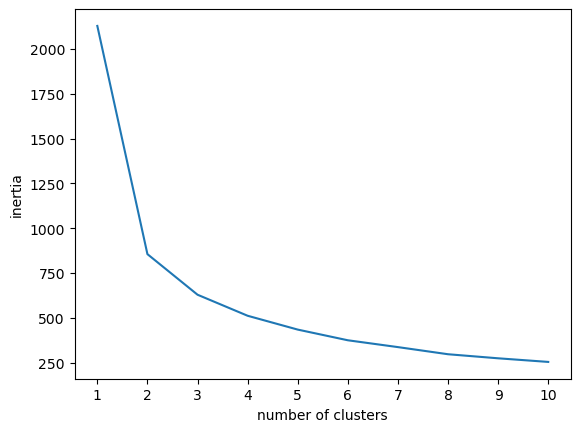

In [37]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

__`Step 3`__ - Apply KMeans to the data using the number of clusters determined in the previous step.

__`Step 4`__- Create a new dataframe called `df_value_kx`, where x is number of clusters. Then, assign a label to each observation based on its cluster and assign a name to each label, storing it in a variable called `CustomerValue`.

__`Step 5`__- Use the `describe()` method to view the descriptive statistics for each cluster.

[BACK TO TOC](#toc)

<div class="alert alert-block alert-success">
<a id='merge'>
<font color = '#006400'> 

## 5. Merge different perspectives </font>
</a>
    
</div>

__Step 23:__ When applying different perspectives, you need at the end to concatenate them in order to obtain a "full-overview" of each customer.

In [ ]:
merge_pespectives_df = pd.concat([df_prod_k3, df_value_k3['CostumerValue']], axis = 1)
merge_pespectives_df.head(3)

__Step 24:__ Create a new column named `concat` that contains the information of each cluster for both perspectives for each customer.

In [ ]:
merge_pespectives_df['concat'] = merge_pespectives_df['ProductUsage'].astype(str) \
                                 + ' AND ' + merge_pespectives_df['CostumerValue'].astype(str)

__Step 25:__ Check how many customers you have in each group using the method `value_counts()`.

In [ ]:
merge_pespectives_df['concat'].value_counts()

__Step 26:__ Check how many customers you have in each group using a crosstable.

In [ ]:
# create a crosstable using pandas
resp = pd.crosstab(index = merge_pespectives_df['ProductUsage'], columns = merge_pespectives_df['CostumerValue'])

fig, ax = plt.subplots(figsize = (6, 3), dpi = 80, facecolor = 'w', edgecolor = 'k', constrained_layout = False)

# plot the crosstable as a heatmap
sns.heatmap(resp,  annot = True, fmt = '.0f', cmap = 'GnBu', vmin = 0, linewidths = .5,\
                     cbar_kws = {'shrink': .75, 'label': 'Customer Counts'})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, horizontalalignment = "right")

ax.invert_yaxis()
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_position('bottom')